--> Using different Statistical models on the same dataset. Just for practice

In [1]:
from math import sqrt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error

In [33]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.dropna()

df = df.iloc[-100:]
df=df.reset_index(drop=True)

df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2018-09-21,42.0,60.0,51.0,611,1819
1,2018-09-22,44.0,63.0,54.0,611,1819
2,2018-09-23,46.0,61.0,54.0,611,1818
3,2018-09-24,41.0,60.0,51.0,612,1817
4,2018-09-25,41.0,56.0,49.0,612,1816
...,...,...,...,...,...,...
95,2018-12-26,35.0,45.0,40.0,654,1752
96,2018-12-27,33.0,44.0,39.0,655,1752
97,2018-12-28,33.0,47.0,40.0,655,1753
98,2018-12-29,36.0,47.0,42.0,655,1753


In [34]:
df.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [35]:
data = df[['DATE', 'AvgTemp']]

data

,DATE,AvgTemp
0,2018-09-21,51.0
1,2018-09-22,54.0
2,2018-09-23,54.0
3,2018-09-24,51.0
4,2018-09-25,49.0
...,...,...
95,2018-12-26,40.0
96,2018-12-27,39.0
97,2018-12-28,40.0
98,2018-12-29,42.0


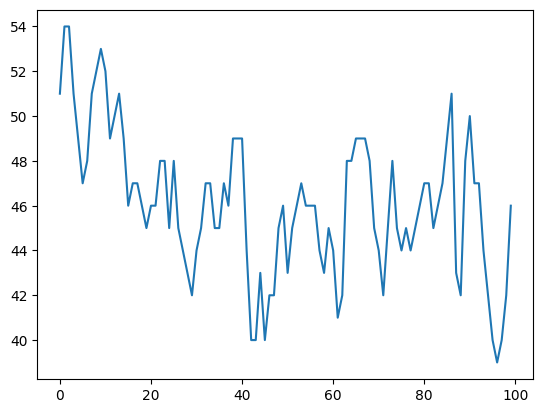

In [36]:
plt.plot(data['AvgTemp'])

In [37]:
data.isnull().sum()

DATE       0
AvgTemp    0
dtype: int64

In [38]:
data.dropna()

,DATE,AvgTemp
0,2018-09-21,51.0
1,2018-09-22,54.0
2,2018-09-23,54.0
3,2018-09-24,51.0
4,2018-09-25,49.0
...,...,...
95,2018-12-26,40.0
96,2018-12-27,39.0
97,2018-12-28,40.0
98,2018-12-29,42.0


In [39]:
data.isnull().sum()

DATE       0
AvgTemp    0
dtype: int64

In [40]:
concerned = data['AvgTemp']

concerned

0     51.0
1     54.0
2     54.0
3     51.0
4     49.0
      ... 
95    40.0
96    39.0
97    40.0
98    42.0
99    46.0
Name: AvgTemp, Length: 100, dtype: float64

--> Checking for stationarity

In [41]:
adf1 = adfuller(concerned)

adf1[1]

6.611541516539954e-05

In [42]:
len(concerned)

100

In [43]:
X = concerned.iloc[:88]
Y = concerned.iloc[88:]

print(X, Y)

0     51.0
1     54.0
2     54.0
3     51.0
4     49.0
      ... 
83    46.0
84    47.0
85    49.0
86    51.0
87    43.0
Name: AvgTemp, Length: 88, dtype: float64 88    42.0
89    48.0
90    50.0
91    47.0
92    47.0
93    44.0
94    42.0
95    40.0
96    39.0
97    40.0
98    42.0
99    46.0
Name: AvgTemp, dtype: float64


In [44]:
len(Y)

12

--> This shows that the data is non-stationary

--> Using Auto Arima (Seasonal=False)

In [45]:
stepwise1 = auto_arima(X.values, seasonal=False, m=12, stepwise=True, trace=True)

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecati

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=377.472, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=383.459, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=385.455, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=385.452, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=381.619, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=375.593, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=377.888, Time=0.03 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:1

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=377.577, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=376.779, Time=0.06 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=375.473, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=382.984, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=377.473, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=383.498, Time=0.04 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=378.472, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=374.729, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=376.526, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=381.209, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=376.729, Time=0.08 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:1

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=376.729, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=383.616, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=374.879, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=381.761, Time=0.02 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=377.744, Time=0.15 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 1.799 seconds


In [46]:
stepwise1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -183.364
Date:                Fri, 10 Jan 2025   AIC                            374.729
Time:                        16:17:36   BIC                            384.593
Sample:                             0   HQIC                           378.701
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7650      0.152      5.044      0.000       0.468       1.062
ar.L2         -0.2408      0.109     -2.206      0.027      -0.455      -0.027
ma.L1         -0.8754      0.094     -9.347      0.000      -1.059      -0.692
sigma2         3.9317      0.601      6.546      0.000       2.755       5.109
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.86   Prob(JB):                         0.25
Heteroskedasticity (H):               1.43   Skew:                            -0.39
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

--> Model1: ARIMA(Seasonal=False)

In [48]:
model1 = ARIMA(X.values, order=(3,1,2))
model1_fit = model1.fit()

forecast1 = model1_fit.forecast(steps=len(Y))

forecast1

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([42.18307004, 43.88989223, 44.72455347, 45.51362551, 45.44955403,
       45.66249962, 45.45372327, 45.59527167, 45.43887903, 45.5664774 ,
       45.44919056, 45.55454701])

In [49]:
len(forecast1)

12

In [50]:
mse1 = mean_squared_error(Y.values, forecast1)
rmse1 = sqrt(mse1)

print(mse1, rmse1)

14.992448391012978 3.8720083149462603


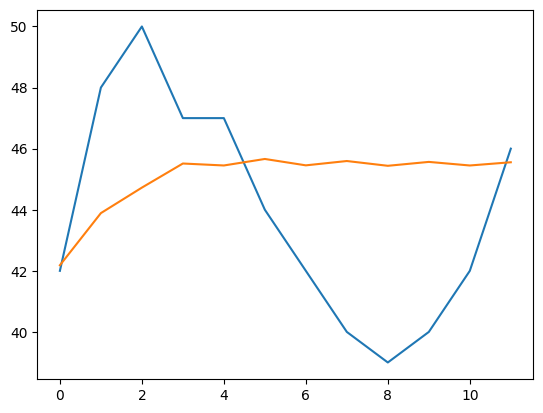

In [51]:
plt.plot(Y.values)
plt.plot(forecast1)

--> Model2 : SARIMA(Seasonal= False)

In [53]:
model2 = SARIMAX(X.values, order=(2,1,1), enforce_stationarity=False, enforce_invertibility=False)
model2_fit = model2.fit()

forecast2 = model2_fit.forecast(steps=len(Y))

forecast2

array([42.32697708, 43.64907573, 44.82237141, 45.42202451, 45.61401759,
       45.6239545 , 45.58743762, 45.55702135, 45.54199213, 45.53741248,
       45.53734238, 45.53834202])

In [54]:
Y

88    42.0
89    48.0
90    50.0
91    47.0
92    47.0
93    44.0
94    42.0
95    40.0
96    39.0
97    40.0
98    42.0
99    46.0
Name: AvgTemp, dtype: float64

In [55]:
mse2 = mean_squared_error(Y.values, forecast2)
rmse2 = sqrt(mse2)

print(mse2, rmse2)

15.23584901240652 3.903312569140027


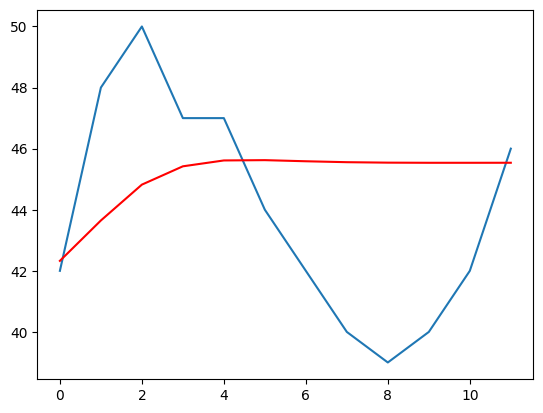

In [56]:
plt.plot(Y.values)
plt.plot(forecast2, color='red')

--> Now moving onto auto arima (seasonal=True)

In [58]:
stepwise2 = auto_arima(X.values, seasonal=True, m=12, stepwise=True, trace=True)

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:1

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=380.679, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=383.459, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=387.247, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=387.245, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=381.619, Time=0.01 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:1

 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=379.288, Time=0.62 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=377.472, Time=0.23 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=379.292, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=375.593, Time=0.08 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=377.415, Time=0.20 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=377.409, Time=0.23 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=377.888, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.16 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=377.577, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=385.452, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=376.779, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=375.473, Time=0.08 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=377.304, Time=0.21 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=377.300, Time=0.22 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=382.984, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=377.473, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=385.455, Time=0.02 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:1

 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=383.498, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=378.472, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=374.729, Time=0.05 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=376.591, Time=0.12 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=376.590, Time=0.14 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=376.526, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=381.209, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=376.729, Time=0.08 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=376.729, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=383.616, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=374.879, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[12]             : AIC=381.761, Time=0.02 sec


C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[12]             : AIC=377.744, Time=0.15 sec

Best model:  ARIMA(2,1,1)(0,0,0)[12]          
Total fit time: 7.005 seconds


In [59]:
stepwise2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -183.364
Date:                Fri, 10 Jan 2025   AIC                            374.729
Time:                        16:35:05   BIC                            384.593
Sample:                             0   HQIC                           378.701
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7650      0.152      5.044      0.000       0.468       1.062
ar.L2         -0.2408      0.109     -2.206      0.027      -0.455      -0.027
ma.L1         -0.8754      0.094     -9.347      0.000      -1.059      -0.692
sigma2         3.9317      0.601      6.546      0.000       2.755       5.109
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.86   Prob(JB):                         0.25
Heteroskedasticity (H):               1.43   Skew:                            -0.39
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model3 = ARIMA(X.values, order=(2,1,1))
model3_fit = model1.fit()

forecast3 = model3_fit.forecast(steps=len(Y))

forecast3

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([42.18307004, 43.88989223, 44.72455347, 45.51362551, 45.44955403,
       45.66249962, 45.45372327, 45.59527167, 45.43887903, 45.5664774 ,
       45.44919056, 45.55454701])

In [62]:
mse3 = mean_squared_error(Y.values, forecast3)
rmse3 = sqrt(mse3)
print(mse3, rmse3)

14.992448391012978 3.8720083149462603


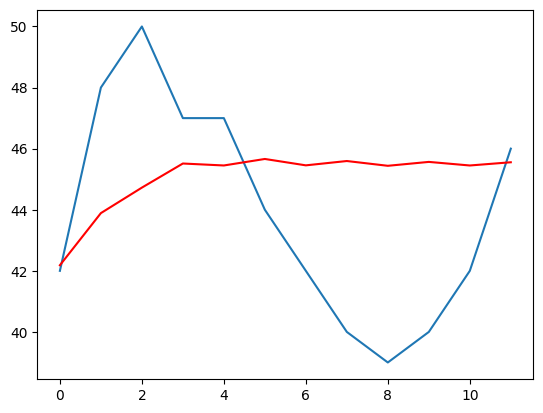

In [63]:
plt.plot(Y.values)
plt.plot(forecast3, color='red')